# Data Preprocessing and Understanding

## Set Workspace

In [1]:
# Import neccessary packages

import numpy as np
import pandas as pd
import random
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize

import stylecloud
from wordcloud import (WordCloud, 
                       ImageColorGenerator,
                       STOPWORDS)

In [2]:
# Settings to display dataframes

pd.options.display.max_colwidth=None
pd.options.display.max_rows=None
pd.options.display.float_format = "{:,.2f}".format

In [3]:
# Settings for figures and plots

%matplotlib inline

sns.set_style("darkgrid")
colors = sns.color_palette('PuBuGn')

## Load Data

In [4]:
# Data on horse colic
horse_df = pd.read_csv('data/horse_colic.csv')
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library"
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net"


In [5]:
# Get the data shape
horse_df.shape

(1050, 4)

In [6]:
# Check for duplicated records
horse_df.duplicated().sum()

120

In [7]:
# Drop the duplicates
horse_df.drop_duplicates(inplace=True)

# Check for success
horse_df.duplicated().sum()

0

## Preprocess Data

<div class="alert alert-block alert-info">
The data preprocessing consists of the following steps:
    <li> replace NaN values in TruncAbstract with the empty string,</li>
    <li>create a Label column that contains the type markers from the Title column,</li>
    <li>rename the labels,</li>
    <li>create a CleanTitle column that contains the titles without the type markers,</li>
    <li>combine the CleanTitle with TruncAbstract to create a CleanAugmAbstr column,</li>
    <li>remove the line delimitators from CleanAugmAbstr texts.</li>
</div>

In [8]:
# The following codes are used in the dataset
codes = ['[PDF][PDF]', '[BOOK][B]', '[HTML][HTML]', '[DOC][DOC]', '[CITATION][C]']

# Create a replacement dictionary
replace_dict = {'[PDF][PDF]':'PDF', '[BOOK][B]':'BOOK', 
                '[HTML][HTML]':'HTML', '[DOC][DOC]':'DOC', 
                '[CITATION][C]': 'CITE', 'ART':'ART'}

In [9]:
# Find how many missing values
horse_df.isna().sum()

Title           0
TruncAbstr    166
AugmTitle       0
Info            0
dtype: int64

In [10]:
# The missing abstract entries correspond to citation items
df_no_abstract = horse_df[horse_df.isna().any(axis=1)]
df_no_abstract.head(2)

,Title,TruncAbstr,AugmTitle,Info
97,[CITATION][C] Study on the diagnosis of the common real equine colic with a computer system,NaN,"('[CITATION][C] Study on the diagnosis of the common real equine colic with a computer system', '')","Z Xin - Chinese Journal of Animal and Veterinary Sciences, 1987"
115,[CITATION][C] Colic incidence and mortality,NaN,"('[CITATION][C] Colic incidence and mortality', '')","MK Tinker, NA Whitet, B Davist, DK Carmelw - Equine vet J, 1997"


In [11]:
# Fill in the missing values with the empty string
horse_df = horse_df.fillna('')

# Check for success
horse_df.isna().sum()

Title         0
TruncAbstr    0
AugmTitle     0
Info          0
dtype: int64

In [12]:
# Create a new column to hold the labels
horse_df['Label'] = 'ART'
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library",ART
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net",ART


In [13]:
# Populate the Label column with the codes extracted from Title column
# This does not seem to work, it sometimes assigns other labels than the expected ones!
for c in codes:
    horse_df['Label'] = np.where(horse_df['Title'].str.contains(c), c, horse_df['Label'])

# Check the output
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library",ART
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net",[PDF][PDF]


In [14]:
# Replace the labels with shorter expressions
horse_df['Label'] = horse_df['Label'].replace(replace_dict)
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library",ART
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net",PDF


In [15]:
# Create a column to clean the titles 
horse_df['CleanTitle'] = horse_df.Title

In [16]:
# Remove the labels from titles
for c in codes:
    horse_df['CleanTitle'] = horse_df['CleanTitle'].str.replace(c,'', regex=False)
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label,CleanTitle
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library",ART,Prospective study of equine colic risk factors
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net",PDF,Dietary and other management factors associated with equine colic


In [17]:
# Group items by type - there are no items books??
horse_df.groupby('Label').size()

Label
ART     743
CITE     40
DOC      17
HTML     46
PDF      84
dtype: int64

In [18]:
# Combine Title and TruncAbstract and replace the AugmTitle column
horse_df['CleanAugmTitle'] = horse_df['CleanTitle'] + ' ' + ' . '+ ' ' + horse_df['TruncAbstr']
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label,CleanTitle,CleanAugmTitle
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library",ART,Prospective study of equine colic risk factors,Prospective study of equine colic risk factors . A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net",PDF,Dietary and other management factors associated with equine colic,"Dietary and other management factors associated with equine colic . … Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …"


In [19]:
# Remove the line delimitators in the AugmTitle column
horse_df.CleanAugmTitle = horse_df.CleanAugmTitle.str.replace('\n','', regex=False)
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label,CleanTitle,CleanAugmTitle
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library",ART,Prospective study of equine colic risk factors,Prospective study of equine colic risk factors . A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine colic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net",PDF,Dietary and other management factors associated with equine colic,"Dietary and other management factors associated with equine colic . … Equine colic is an important cause of disease and death in horses. Relatively few … , and to examine other management factors associated with equine colic. Because horses examined at …"


## Exploratory Data Analysis

### Statistics of Character Length for AugmTitle

In [20]:
# Create a column that records the character length of the augumented titles
horse_df['LenCleanAugmTitle'] = horse_df['CleanAugmTitle'].str.len()
horse_df.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label,CleanTitle,CleanAugmTitle,LenCleanAugmTitle
0,Prospective study of equine colic risk factors,A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')","MK Tinker, NA White, P Lessard… - Equine veterinary …, 1997 - Wiley Online Library",ART,Prospective study of equine colic risk factors,Prospective study of equine colic risk factors . A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine colic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …,235
1,[PDF][PDF] Dietary and other management factors associated with equine colic,"… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …","('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')","N Cohen, P Gibbs, A Woods - J. Am. Vet. Med. Assoc, 1999 - researchgate.net",PDF,Dietary and other management factors associated with equine colic,"Dietary and other management factors associated with equine colic . … Equine colic is an important cause of disease and death in horses. Relatively few … , and to examine other management factors associated with equine colic. Because horses examined at …",257


In [21]:
# Get the statistics for the length of the augmented titles
horse_df.LenCleanAugmTitle.describe()

count   930.00
mean    229.38
std      84.34
min      17.00
25%     212.00
50%     253.00
75%     286.00
max     361.00
Name: LenCleanAugmTitle, dtype: float64

In [22]:
# Investigate the shortest augumented titles
short_texts = horse_df[horse_df.LenCleanAugmTitle < 41]
short_texts.sort_values(by=['LenCleanAugmTitle'])
short_texts.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label,CleanTitle,CleanAugmTitle,LenCleanAugmTitle
115,[CITATION][C] Colic incidence and mortality,,"('[CITATION][C] Colic incidence and mortality', '')","MK Tinker, NA Whitet, B Davist, DK Carmelw - Equine vet J, 1997",ART,Colic incidence and mortality,Colic incidence and mortality .,35
175,[CITATION][C] Health seminar equine colic survey,,"('[CITATION][C] Health seminar equine colic survey', '')","NT Messer - Journal of Equine Veterinary Science, 1987 - WB Saunders",ART,Health seminar equine colic survey,Health seminar equine colic survey .,40


In [23]:
# Drop the rows with texts shorter than 20 characters
updated_df = horse_df[horse_df.LenCleanAugmTitle > 21]

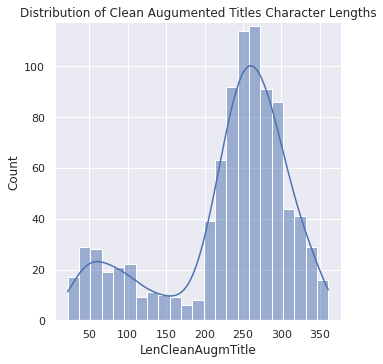

In [24]:
# Adjust figure size and font size
sns.set(rc = {"figure.figsize":(18,8)})

# Plot the distribution of length of the augumented title
sns.displot(updated_df['LenCleanAugmTitle'], kde = True)

# Pad margins so that markers don't get clipped by the axes
plt.margins(x=0.05, y=0.01, tight=True)

# Create title
plt.title("Distribution of Clean Augumented Titles Character Lengths");

### Frequent Words Investigation

In [25]:
# Lowercase the titles
horse_df['CleanTitle'] = horse_df['CleanTitle'].str.lower()

# Check how many titles contain the word colic or Colic
contain_values = horse_df[horse_df['CleanTitle'].str.contains('colic')]
len(contain_values)

639

In [26]:
# Lowercase the augmented titles
horse_df['CleanAugmTitle'] = horse_df['CleanAugmTitle'].str.lower()

# Check how many augmented titles contain the word colic
contains_list = horse_df[horse_df['CleanAugmTitle'].str.contains('colic')]
len(contains_list)

834

In [27]:
# Inspect the items that do not contain the word colic
list_nocolic = horse_df[~horse_df['CleanAugmTitle'].str.contains('colic')]
list_nocolic.head(2)

,Title,TruncAbstr,AugmTitle,Info,Label,CleanTitle,CleanAugmTitle,LenCleanAugmTitle
112,[BOOK][B] The equine acute abdomen,"Written and edited by leading experts on equine digestive diseases, The Equine Acute \nAbdomen, Third Editionis the preeminent text on diagnosing and treating acute abdominal …","('[BOOK][B] The equine acute abdomen', 'Written and edited by leading experts on equine digestive diseases, The Equine Acute \nAbdomen, Third Editionis the preeminent text on diagnosing and treating acute abdominal …')","AT Blikslager, NA White, JN Moore, TS Mair - 2017 - books.google.com",DOC,the equine acute abdomen,"the equine acute abdomen . written and edited by leading experts on equine digestive diseases, the equine acute abdomen, third editionis the preeminent text on diagnosing and treating acute abdominal …",204
155,Cisapride in the prophylaxis of equine post operative ileus,"Cisapride and domperidone were both effective in restoring electrical and mechanical activity, \ncoordination between gastric and small intestinal activity cycles and the stomach to anus …","('Cisapride in the prophylaxis of equine post operative ileus', 'Cisapride and domperidone were both effective in restoring electrical and mechanical activity, \ncoordination between gastric and small intestinal activity cycles and the stomach to anus …')","EL Gerring, JN King - Equine Veterinary Journal, 1989 - Wiley Online Library",ART,cisapride in the prophylaxis of equine post operative ileus,"cisapride in the prophylaxis of equine post operative ileus . cisapride and domperidone were both effective in restoring electrical and mechanical activity, coordination between gastric and small intestinal activity cycles and the stomach to anus …",250


### Wordcloud for CleanTitle

In [28]:
# Get and update the stopwords to be removed from the wordcloud
stopwords = set(STOPWORDS)
stopwords.update(['equine', 'colic', 'horse', 'horses', 'case', 'cases', 'clinical'])

In [29]:
# Create a string with all the relevant words in the CleanTitle column
list_texts = horse_df.CleanTitle.str.lower().apply(word_tokenize)
text = ' '.join(t for t in list_texts.astype(str))
text = re.sub(r"[^a-zA-Z0-9]", " ", text).strip()

In [30]:
#function from https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 80)

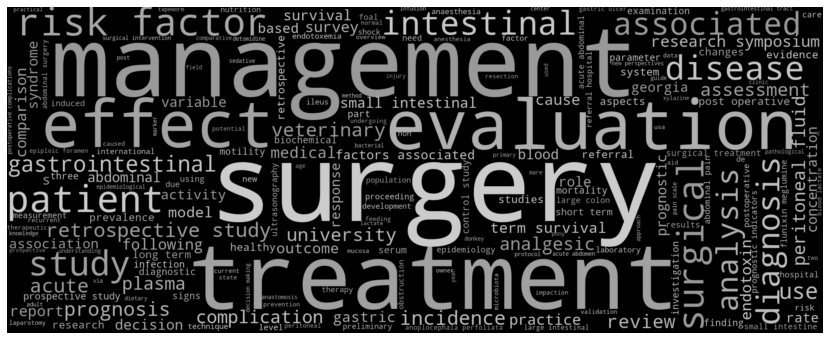

In [31]:
# Create a wordcloud from the titles

# create the figure and title
plt.figure(figsize=(24, 6))

# generate the wordcloud from frequencies
wc = WordCloud(stopwords=stopwords,
               width = 2000, 
               height=800, 
               margin=1, 
               random_state=1).generate(text)

# display the fitted and recolored wordcloud
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

# turn axis off to get rid of axis numbers
plt.axis("off")

# save to file
wc.to_file("wc_titles.png")

plt.show()                                                                         

## Save Titles Data

In [32]:
# Prepare the text column
df_titles = updated_df[['CleanTitle']]
raw_titles = updated_df[['Title']]

# Rename the title column
df_titles = df_titles.rename(columns = {'CleanTitle': 'text'})
raw_titles = raw_titles.rename(columns = {'Title': 'text'})

In [33]:
# Check the outcome
df_titles.head(2)

,text
0,Prospective study of equine colic risk factors
1,Dietary and other management factors associated with equine colic


In [34]:
# Check the outcome
raw_titles.head(2)

,text
0,Prospective study of equine colic risk factors
1,[PDF][PDF] Dietary and other management factors associated with equine colic


In [35]:
# Save the text column to a file
df_titles.to_csv('data/clean_titles.csv')  
raw_titles.to_csv('data/raw_titles.csv')  

## Save Augumented Title Data

In [36]:
# Prepare the text column 
df_augm = updated_df[['CleanAugmTitle']]
# Rename the text column 
df_augm = df_augm.rename(columns={'CleanAugmTitle': 'text'})
df_augm.head(2)

,text
0,Prospective study of equine colic risk factors . A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine colic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …
1,"Dietary and other management factors associated with equine colic . … Equine colic is an important cause of disease and death in horses. Relatively few … , and to examine other management factors associated with equine colic. Because horses examined at …"


In [37]:
# Prepare the text column 
raw_df = updated_df[['AugmTitle']]
# Rename the text column 
raw_df = raw_df.rename(columns={'AugmTitle': 'text'})
raw_df.head(2)

,text
0,"('Prospective study of equine colic risk factors', 'A1 year prospective study was conducted on 31 horse farms to identify risk factors for equine \ncolic. Farms were randomly selected from a list from 2 adjacent counties of Virginia and …')"
1,"('[PDF][PDF] Dietary and other management factors associated with equine colic', '… Equine colic is an important cause of disease and death in horses. Relatively few … , and to \nexamine other management factors associated with equine colic. Because horses examined at …')"


In [38]:
# Save the text column to a file
df_augm.to_csv('data/clean_augm_titles.csv')  
# Save the text column to a file
raw_df.to_csv('data/raw_augm_titles.csv')  